# Isolines: Toy Dataset

In [1]:
# load libraries
library(MASS)
library(ismev)
library(evd)
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(gridExtra)
library(repr)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.


Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
# load up the R functions from the OG isolines paper
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/orig_isolines.R')

## Quick, Single-Sim Example

## Generate Data

In [79]:
n <- 500
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

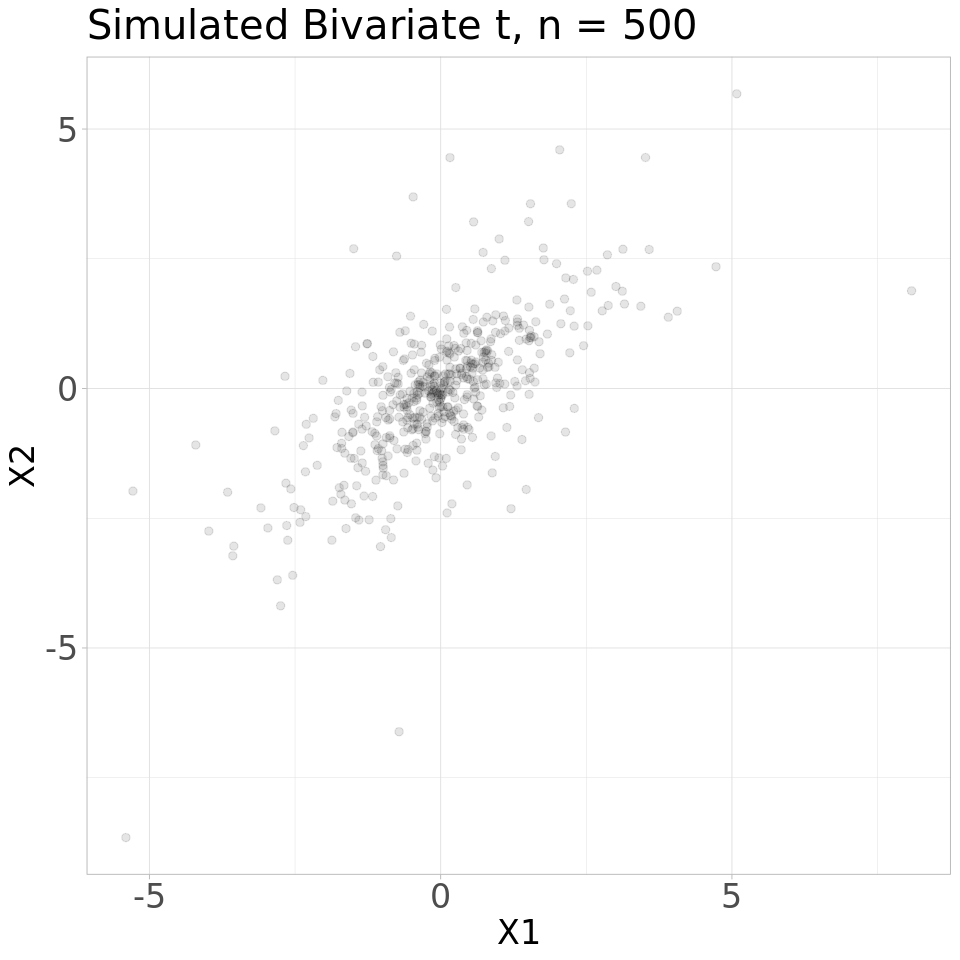

In [80]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(t_dat) + geom_point(aes(x = X1, y = X2), alpha = 0.1, size = 2) + 
ggtitle(paste('Simulated Bivariate t, n =', n)) + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

## Apply Method

In [93]:
t_out <- xContours(dat = t_dat %>% sample_frac(1, replace = TRUE))

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

In [94]:
base_dat <- data.frame(t_out$contourOrig)
proj1_dat <- data.frame(t_out$projContours[[1]])
proj2_dat <- data.frame(t_out$projContours[[2]])
proj3_dat <- data.frame(t_out$projContours[[3]])

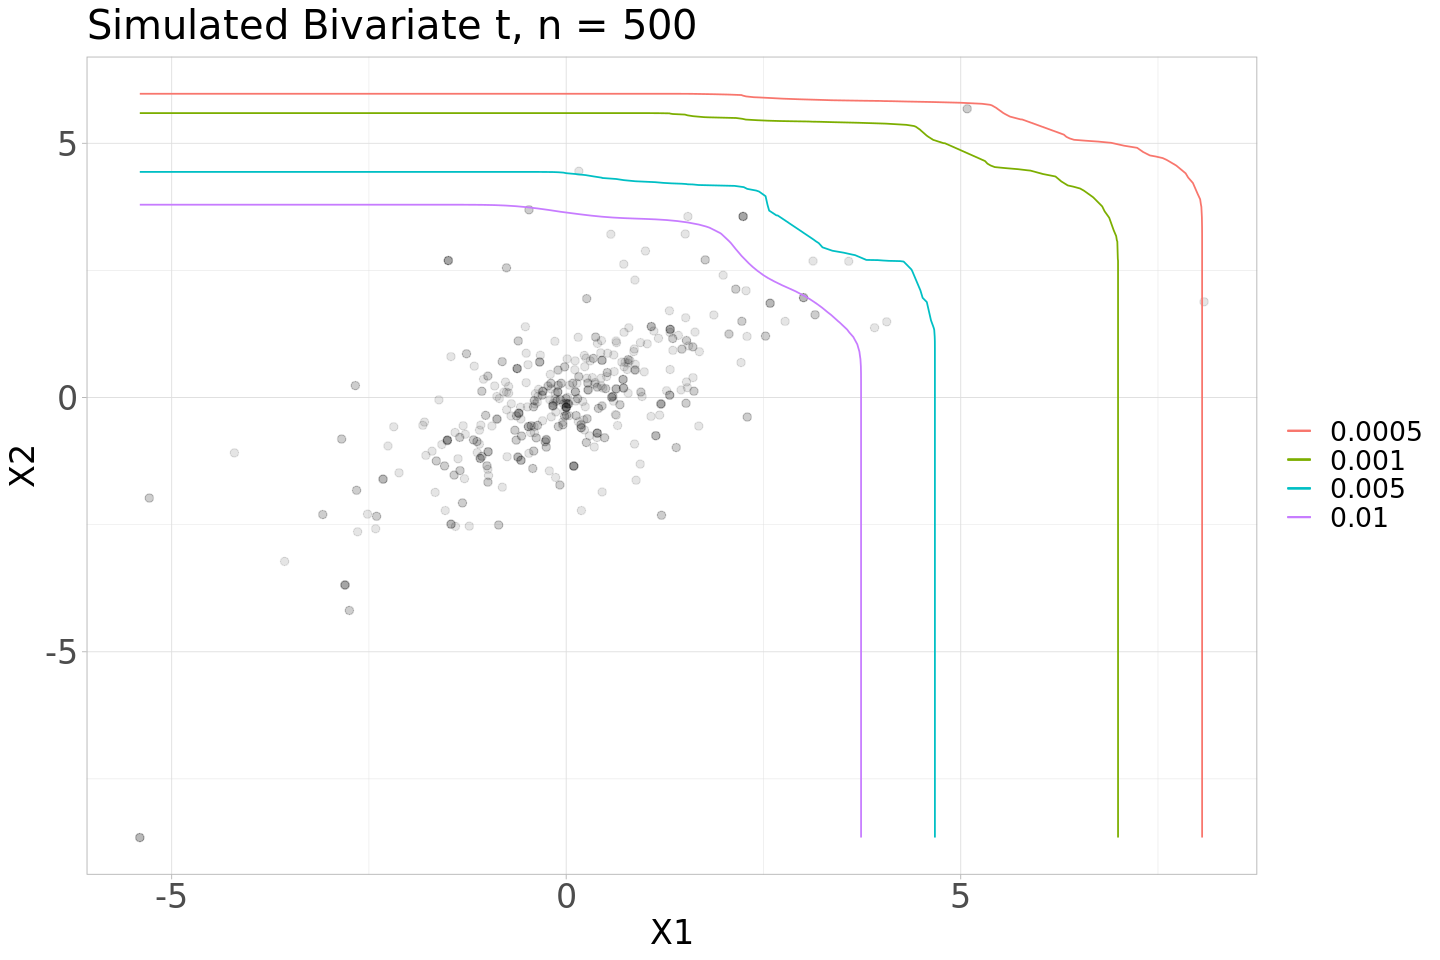

In [95]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot() + geom_point(data = t_out$data, aes(x = X1, y = X2), alpha = 0.1, size = 2) + 
geom_line(data = base_dat, aes(x = X1, y = X2, color = '0.01')) + 
geom_line(data = proj1_dat, aes(x = X1, y = X2, color = '0.005')) + 
geom_line(data = proj2_dat, aes(x = X1, y = X2, color = '0.001')) + 
geom_line(data = proj3_dat, aes(x = X1, y = X2, color = '0.0005')) + 
ggtitle(paste('Simulated Bivariate t, n =', n)) + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20), legend.title = element_blank())

# Bootstrapping for Single Dataset

Standard bootstrap resampling (as opposed to block bootstrap) justified by i.i.d. nature of observed toy data.

issue: warning statements potentially from doing interpolation with degenerate data?

### Bootstrapping Procedure Demo

In [ ]:
n_samps <- 300

boot_samps <- vector(mode = 'list', length = n_samps)

for (i in 1:n_samps) {
    boot_dat <- t_dat %>% sample_frac(1, replace = TRUE)
    boot_out_full <- suppressWarnings(xContours(dat = boot_dat))
    boot_out <- list()
    boot_out$contourOrig <- boot_out_full$contourOrig
    boot_out$projContours <- boot_out_full$projContours
    
    boot_samps[[i]] <- boot_out
    
}

#### Bootstrapped Isolines, Different Uncertainty Levels

In [ ]:
boot_plt1 <- ggplot() + geom_point(data = t_dat, aes(x = X1, y = X2), alpha = 0.1, size = 2)

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$contourOrig)
    boot_plt1 <- boot_plt1 + geom_line(data = boot_dat, aes(x = X1, y = X2), alpha = 0.1, col = 'blue')
}
boot_plt1 + ggtitle(paste('p = 0.05, n =', n)) + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

#### Confidence Intervals for One-Fixed Coordinate

In [ ]:
coords <- rep(0, n_samps)

x1 <- 2.5

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$contourOrig)
    coords[i] <- suppressWarnings(approx(x = boot_dat$X1, y = boot_dat$X2, xout = x1)$y)
}

In [ ]:
alpha <- 0.05
qtiles <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2))))

ggplot(data = data.frame(X = coords)) + geom_histogram(aes(x = X), binwidth = 0.2, alpha = 0.4) + 
ggtitle(paste('X1 =', x1)) + xlab('X2') + theme_light() + geom_errorbarh(aes(y = 5, xmin = qtiles[1], xmax = qtiles[2]), col = 'blue', size = 1.2) + 

theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
coords <- rep(0, n_samps)

x1 <- 3

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$contourOrig)
    coords[i] <- suppressWarnings(approx(x = boot_dat$X1, y = boot_dat$X2, xout = x1)$y)
}

In [ ]:
alpha <- 0.05
qtiles <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2))))

ggplot(data = data.frame(X = coords)) + geom_histogram(aes(x = X), binwidth = 0.2, alpha = 0.4) + 
ggtitle(paste('X1 =', x1)) + xlab('X2') + theme_light() + geom_errorbarh(aes(y = 5, xmin = qtiles[1], xmax = qtiles[2]), col = 'blue', size = 1.2) + 

theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
coords <- rep(0, n_samps)

x2 <- 2.5

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$contourOrig)
    coords[i] <- suppressWarnings(approx(x = boot_dat$X2, y = boot_dat$X1, xout = x2)$y)
}

In [ ]:
alpha <- 0.05
qtiles <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2))))

ggplot(data = data.frame(X = coords)) + geom_histogram(aes(x = X), binwidth = 0.2, alpha = 0.4) + 
ggtitle(paste('X2 =', x2)) + xlab('X1') + theme_light() + geom_errorbarh(aes(y = 5, xmin = qtiles[1], xmax = qtiles[2]), col = 'blue', size = 1.2) + 

theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
boot_plt2 <- ggplot() + geom_point(data = t_dat, aes(x = X1, y = X2), alpha = 0.1, size = 2)

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$projContours[[1]])
    boot_plt2 <- boot_plt2 + geom_line(data = boot_dat, aes(x = X1, y = X2), alpha = 0.1, col = 'blue')
}
boot_plt2 + ggtitle(paste('p = 0.01, n =', n)) + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
coords <- rep(0, n_samps)

x1 <- 2.5

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$projContours[[1]])
    coords[i] <- suppressWarnings(approx(x = boot_dat$X1, y = boot_dat$X2, xout = x1)$y)
}

alpha <- 0.05
qtiles <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2))))

ggplot(data = data.frame(X = coords)) + geom_histogram(aes(x = X), binwidth = 0.2, alpha = 0.4) + 
ggtitle(paste('X1 =', x1)) + xlab('X2') + theme_light() + geom_errorbarh(aes(y = 5, xmin = qtiles[1], xmax = qtiles[2]), col = 'blue', size = 1.2) + 

theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
coords <- rep(0, n_samps)

x2 <- 2.5

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$projContours[[1]])
    coords[i] <- suppressWarnings(approx(x = boot_dat$X2, y = boot_dat$X1, xout = x2)$y)
}

alpha <- 0.05
qtiles <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2))))

ggplot(data = data.frame(X = coords)) + geom_histogram(aes(x = X), binwidth = 0.2, alpha = 0.4) + 
ggtitle(paste('X2 =', x2)) + xlab('X1') + theme_light() + geom_errorbarh(aes(y = 5, xmin = qtiles[1], xmax = qtiles[2]), col = 'blue', size = 1.2) + 

theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
boot_plt3 <- ggplot() + geom_point(data = t_dat, aes(x = X1, y = X2), alpha = 0.1, size = 2)

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$projContours[[2]])
    boot_plt3 <- boot_plt3 + geom_line(data = boot_dat, aes(x = X1, y = X2), alpha = 0.1, col = 'blue')
}
boot_plt3 + ggtitle(paste('p = 0.005, n =', n)) + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
boot_plt4 <- ggplot() + geom_point(data = t_dat, aes(x = X1, y = X2), alpha = 0.1, size = 2)

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$projContours[[3]])
    boot_plt4 <- boot_plt4 + geom_line(data = boot_dat, aes(x = X1, y = X2), alpha = 0.1, col = 'blue')
}
boot_plt4 + ggtitle(paste('p = 0.001, n =', n)) + theme_light() + 
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
coords <- rep(0, n_samps)

x1 <- 2.5

for (i in 1:n_samps) {
    boot_dat <- data.frame(boot_samps[[i]]$projContours[[3]])
    coords[i] <- suppressWarnings(approx(x = boot_dat$X1, y = boot_dat$X2, xout = x1)$y)
}

alpha <- 0.05
qtiles <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2))))

ggplot(data = data.frame(X = coords)) + geom_histogram(aes(x = X), binwidth = 0.2, alpha = 0.4) + 
ggtitle(paste('X1 =', x1)) + xlab('X2') + theme_light() + geom_errorbarh(aes(y = 5, xmin = qtiles[1], xmax = qtiles[2]), col = 'blue', size = 1.2) + 

theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

# Bootstrapping Experiments

## Varying Sample Size (Single Simulation per Sample Size)
#### Backup in case big simulation run doesn't work

Sample sizes: 500 to 10000, increments of 500

In [ ]:
multDatasets <- readRDS('/global/u1/j/jbbutler/isolines_uq/sims/bootstrap_experiments/single_sim_bootstrap_experiments.RData')


In [ ]:
ns <- (1:20)*500
n_samps <- 200

In [ ]:
boot_n_plts <- vector(mode = 'list', length = length(ns))

num_isolines <- length(multDatasets[[1]][[1]][[2]]) + 1
isolines <- c(0.01, 0.005, 0.001, 0.0005)

for (i in 1:length(ns)) {
    
    isolines_plts <- vector(mode = 'list', length = num_isolines)
    
    for (j in 1:num_isolines) {
    
        isolines_plts[[j]] <- ggplot()

        for (k in 1:n_samps) {
            contours <- c(list(multDatasets[[i]][[k]]$contourOrig), multDatasets[[i]][[k]]$projContours)
            boot_dat <- data.frame(contours[[j]])
            isolines_plts[[j]] <- isolines_plts[[j]] + geom_line(data = boot_dat, aes(x = X1, y = X2), alpha = 0.1, col = 'blue')
        }
    
        isolines_plts[[j]] <- isolines_plts[[j]] + ggtitle(paste('p =', isolines[j], ', n =', ns[i])) + theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
        
    }
    
    boot_n_plts[[i]] <- isolines_plts
    
    print(i)
    
}


In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
do.call("grid.arrange", c(boot_n_plts[[1]], ncol=2))

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
do.call("grid.arrange", c(boot_n_plts[[5]], ncol=2))

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
do.call("grid.arrange", c(boot_n_plts[[10]], ncol=2))

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
do.call("grid.arrange", c(boot_n_plts[[20]], ncol=2))

## Varying Sample Size (100 simulations per sample)

Hopefully gives an idea of coverage of bootstrap confidence intervals, etc.

In [4]:
multDatasets <- readRDS('/global/u1/j/jbbutler/isolines_uq/sims/bootstrap_experiments/bivariate_t/big_bootstrap_experiments.RData')

#### Fixing $X_2 = 5.63$, Predict true $X_1 = 5.63$

In [5]:
cIs <- vector(mode = 'list', length = length(multDatasets))

x2 <- 5.63
alpha <- 0.05

# for every sample size
for (i in 1:length(multDatasets)) {
    samp_CIs <- matrix(rep(0, 2*length(multDatasets[[i]])), ncol = 2)
    
    # for every simulation of that sample size
    for (j in 1:length(multDatasets[[i]])) {
        # for every bootstrap sample of that sample size simulation
        coords <- rep(NA, length(multDatasets[[i]][[j]]))
        
        for (k in 1:length(multDatasets[[i]][[j]])) {
            
            boot_dat <- data.frame(multDatasets[[i]][[j]][[k]][[1]][[3]])
            if (all(boot_dat$X2 == 0)) {
                    print('skipped a loop')
                    next
            }
            coords[k] <- suppressWarnings(approx(x = boot_dat$X2, y = boot_dat$X1, xout = x2)$y)
            }
        
        samp_CIs[j, ] <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2)), na.rm = TRUE))
        
        }
    
    cIs[[i]] <- samp_CIs
    }

[1] "skipped a loop"
[1] "skipped a loop"


In [6]:
coverage_rates <- rep(0, length(multDatasets))
avg_width <- rep(0, length(multDatasets))
for (i in 1:length(multDatasets)) {

    binary_cov <- cIs[[i]][,1] <= 5.63 & cIs[[i]][,2] >= 5.63
    binary_cov <- binary_cov[!is.na(binary_cov)]
    coverage_rates[i] <- mean(binary_cov)
    width <- cIs[[i]][,2] - cIs[[i]][,1]
    avg_width[i] <- mean(width[!is.na(width)])
    
}

In [7]:
plt_df <- data.frame(sample_size = c(500, 2000, 4000, 8000, 16000), coverage_rate = round(coverage_rates, 3), avg_width = avg_width)
plt_df

sample_size,coverage_rate,avg_width
<dbl>,<dbl>,<dbl>
500,0.625,8.459811
2000,0.929,4.938446
4000,0.950,3.735100
8000,0.880,2.571073
16000,0.910,1.722522


In [18]:
n <- 500
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

#### Fixing $X_1 = 0$, Predict true $X_2 = 7.09$

In [ ]:
cIs <- vector(mode = 'list', length = length(multDatasets))

x1 <- 0
x2 <- 7.09
alpha <- 0.05

# for every sample size
for (i in 1:length(multDatasets)) {
    samp_CIs <- matrix(rep(0, 2*length(multDatasets[[i]])), ncol = 2)
    
    # for every simulation of that sample size
    for (j in 1:length(multDatasets[[i]])) {
        # for every bootstrap sample of that sample size simulation
        coords <- rep(NA, length(multDatasets[[i]][[j]]))
        
        for (k in 1:length(multDatasets[[i]][[j]])) {
            
            boot_dat <- data.frame(multDatasets[[i]][[j]][[k]][[1]][[3]])
            if (all(boot_dat$X1 == 0)) {
                    print('skipped a loop')
                    next
            }
            coords[k] <- suppressWarnings(approx(x = boot_dat$X1, y = boot_dat$X2, xout = x1)$y)
            }
        
        samp_CIs[j, ] <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2)), na.rm = TRUE))
        
        }
    
    cIs[[i]] <- samp_CIs
    }

In [ ]:
coverage_rates <- rep(0, length(multDatasets))
avg_width <- rep(0, length(multDatasets))
for (i in 1:length(multDatasets)) {

    binary_cov <- cIs[[i]][,1] <= x2 & cIs[[i]][,2] >= x2
    binary_cov <- binary_cov[!is.na(binary_cov)]
    coverage_rates[i] <- mean(binary_cov)
    width <- cIs[[i]][,2] - cIs[[i]][,1]
    avg_width[i] <- mean(width[!is.na(width)])
    
}

In [ ]:
plt_df <- data.frame(sample_size = c(500, 2000, 4000, 8000, 16000), coverage_rate = round(coverage_rates, 3), avg_width = avg_width)
plt_df

#### Fixing $X_1 = 4.50$, Predict true $X_2 = 6.38$

In [ ]:
cIs <- vector(mode = 'list', length = length(multDatasets))

x1 <- 4.50
x2 <- 6.38
alpha <- 0.05

# for every sample size
for (i in 1:length(multDatasets)) {
    samp_CIs <- matrix(rep(0, 2*length(multDatasets[[i]])), ncol = 2)
    
    # for every simulation of that sample size
    for (j in 1:length(multDatasets[[i]])) {
        # for every bootstrap sample of that sample size simulation
        coords <- rep(NA, length(multDatasets[[i]][[j]]))
        
        for (k in 1:length(multDatasets[[i]][[j]])) {
            
            boot_dat <- data.frame(multDatasets[[i]][[j]][[k]][[1]][[3]])
            if (all(boot_dat$X1 == 0)) {
                    print('skipped a loop')
                    next
            }
            coords[k] <- suppressWarnings(approx(x = boot_dat$X1, y = boot_dat$X2, xout = x1)$y)
            }
        
        samp_CIs[j, ] <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2)), na.rm = TRUE))
        
        }
    
    cIs[[i]] <- samp_CIs
    }

In [ ]:
coverage_rates <- rep(0, length(multDatasets))
avg_width <- rep(0, length(multDatasets))
for (i in 1:length(multDatasets)) {

    binary_cov <- cIs[[i]][,1] <= x2 & cIs[[i]][,2] >= x2
    binary_cov <- binary_cov[!is.na(binary_cov)]
    coverage_rates[i] <- mean(binary_cov)
    avg_width[i] <- mean(cIs[[i]][,2] - cIs[[i]][,1])
    
}

In [ ]:
plt_df <- data.frame(sample_size = c(500, 2000, 4000, 8000, 16000), coverage_rate = round(coverage_rates, 3), avg_width = avg_width)
plt_df

#### Fixing $X_2 = 4.00$, Predict true $X_1 = 6.58$

In [ ]:
cIs <- vector(mode = 'list', length = length(multDatasets))

x2 <- 4.00
alpha <- 0.05

# for every sample size
for (i in 1:length(multDatasets)) {
    samp_CIs <- matrix(rep(0, 2*length(multDatasets[[i]])), ncol = 2)
    
    # for every simulation of that sample size
    for (j in 1:length(multDatasets[[i]])) {
        # for every bootstrap sample of that sample size simulation
        coords <- rep(NA, length(multDatasets[[i]][[j]]))
        
        for (k in 1:length(multDatasets[[i]][[j]])) {
            
            boot_dat <- data.frame(multDatasets[[i]][[j]][[k]][[1]][[3]])
            if (all(boot_dat$X2 == 0)) {
                    print('skipped a loop')
                    next
            }
            coords[k] <- suppressWarnings(approx(x = boot_dat$X2, y = boot_dat$X1, xout = x2)$y)
            }
        
        samp_CIs[j, ] <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2)), na.rm = TRUE))
        
        }
    
    cIs[[i]] <- samp_CIs
    }

In [ ]:
coverage_rates <- rep(0, length(multDatasets))
avg_width <- rep(0, length(multDatasets))
x1 <- 6.58
for (i in 1:length(multDatasets)) {

    binary_cov <- cIs[[i]][,1] <= x1 & cIs[[i]][,2] >= x1
    binary_cov <- binary_cov[!is.na(binary_cov)]
    coverage_rates[i] <- mean(binary_cov)
    avg_width[i] <- mean(cIs[[i]][,2] - cIs[[i]][,1])
    
}

In [ ]:
plt_df <- data.frame(sample_size = c(500, 2000, 4000, 8000, 16000), coverage_rate = round(coverage_rates, 3), avg_width = avg_width)
plt_df

Seem to have some undercoverage issues at high values of both X1 and X2, which seems like a problem because I would think that is the most important place where we would want correct coverage of our uncertainty intervals. Seems like we have better coverage at the periphery (near the axes). I know this isn't the case for the asymptotically independent case, but I think for the purposes of getting return times for bivariate extremes that are particularly impactful to human health, I don't think it makes that much of a difference.

Possible fixes? Confidence intervals/coverage of functions? GPs need observed values along the line..

Questions for Jon:
1. Bootstrap doesn't give simultaneous confidence intervals, does it?

#### Finally, explore what coverage rates and average widths of CIs will be for the various pairings of sample size and rarity

In [ ]:
cIs <- vector(mode = 'list', length = length(multDatasets))

x2 <- 5.63
x1 <- 5.63
alpha <- 0.05

num_n <- length(multDatasets)
num_iso <- length(multDatasets[[1]][[1]][[1]][[3]])

avg_mat <- matrix(rep(0, num_n*num_iso), nrow = num_iso)
coverage_mat <- matrix(rep(0, num_n*num_iso), nrow = num_iso)

# for every sample size
for (i in 1:num_n) {
    samp_CIs <- matrix(rep(0, 2*length(multDatasets[[i]])), ncol = 2)
    
    for (l in 1:num_iso) {
    
        # for every simulation of that sample size
        for (j in 1:length(multDatasets[[i]])) {
            # for every bootstrap sample of that sample size simulation
            coords <- rep(NA, length(multDatasets[[i]][[j]]))
        
            for (k in 1:length(multDatasets[[i]][[j]])) {
            
                boot_dat <- data.frame(multDatasets[[i]][[j]][[k]][[1]][[l]])
                if (sum(! duplicated(boot_dat$X2)==1)) {
                        print('skipped a loop')
                        next
                }
                coords[k] <- suppressWarnings(approx(x = boot_dat$X2, y = boot_dat$X1, xout = x2)$y)
            }
        
            samp_CIs[j, ] <- as.numeric(quantile(coords, probs = c(alpha/2, 1-(alpha/2)), na.rm = TRUE))
        
        }
        
        binary_cov <- samp_CIs[,1] <= x1 & samp_CIs[,2] >= x1
        binary_cov <- binary_cov[!is.na(binary_cov)]
        coverage_mat[l, i] <- mean(binary_cov)
        width <- samp_CIs[,2] - samp_CIs[,1]
        avg_mat[l, i] <- mean(width[!is.na(width)])
    }
}

Question about exploring the rarity of the events and the width of the confidence intervals as a function of rarity? Changing exceedance probability changes the quantiles, so you'd also have to change the locations of the points you are observing at (may not be in the same portion of the curves and the uncertainty interval width might not be comparable; would be comparing the width of the confidence intervals at different points along the isoline curves)

Also, need to get qmvt function working, but I'm not exactly sure how they are doing that..

So, kind of have a question on how to approach this (where along the curve should you be looking in order for it to be best/most comparable)

In [5]:
ns <- c(1000)
n_boot_samps <- 10
n_samps <- 10

source('/global/homes/j/jbbutler/isolines_uq/scripts/R/orig_isolines.R')

In [6]:
parallelizedCode <- function(n, n_boot) {

    boot_out_n_samp <- list()
    gauss_dat <- data.frame(rmvnorm(n, mean = rep(0, 2), sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2)))
    boot_out_n_samp$data <- gauss_dat

    boot_samps <- vector(mode = 'list', length = n_boot)

    for (k in 1:n_boot) {
        boot_out <- list()
        boot_dat <- gauss_dat %>% sample_frac(1, replace = TRUE)
        boot_out_full <- suppressWarnings(xContours(dat = boot_dat, faster = TRUE, asympIndep = TRUE))
        boot_out$boot_out_isolines <- c(list(boot_out_full$contourOrig), boot_out_full$projContours)
        boot_out$boot_out_dat <- boot_dat
        boot_out$boot_out_levels <- c(boot_out_full$setup$baseContourLevel, boot_out_full$setup$projContourLevels)

        boot_samps[[k]] <- boot_out
    }
    boot_out_n_samp$bootstrap_info <- boot_samps

    return(boot_out_n_samp)
}


In [7]:
for (i in 1:length(ns)) {

    print(paste('Starting n:', i))
    start <- proc.time()

    #clust <- makeSOCKcluster(n_cores)
    #registerDoSNOW(clust)
    pb <- txtProgressBar(min = 1, max = n_samps, style = 3)
    progress <- function(n) setTxtProgressBar(pb, n)
    opts <- list(progress = progress)
    boot_out_n_samps <- foreach (j = 1:n_samps, .packages = c('mvtnorm', 'dplyr', 'MASS', 'ismev', 'evd', 'ks'), .options.snow = opts) %do% {

        parallelizedCode(ns[i], n_boot_samps)

    }
    close(pb)
    #stopCluster(clust)

    print(paste('Finished n:', i))
    print(proc.time() - start)

    #saveRDS(boot_out_n_samps, file = paste0('/global/homes/j/jbbutler/isolines_uq/sims/bootstrap_experiments/bivariate_gauss/', ns[i], 'bigger_bivgauss_bootstrap.RData'))

}


[1] "Starting n: 1"

[1] "Finished n: 1"
   user  system elapsed 
 10.209   4.542   7.589 
